<a href="https://colab.research.google.com/github/YerinS/Yerin_Portfolio/blob/main/DL_SchoolLevelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [DL Classification] School Level Classification


- 　__Data__　　　　　　　medical checkup results of 9,682 students in Seoul<br/>
- 　__Features__ 　　　　　sex, height, weight<br/>
- 　__Labels__　　　　 　　school level (elementary, middle, high)<br/>
- 　__Data Source__ 　 　　 Public Data Portal (https://www.data.go.kr)<br/>
- 　__DL Framework__ 　 　 Keras<br/>
- 　__Model Accuracy__　　74.03%<br/>
- 　__Packages__ 　 　 　 　Pandas, NumPy, Matplotlib, TensorFlow v2.7.0<br/>
<br/>

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# 1. Get Data

- Download data from https://www.data.go.kr

In [2]:
from google.colab import files
file = files.upload()

Saving 학생건강검사 결과분석 rawdata_서울_2015.csv to 학생건강검사 결과분석 rawdata_서울_2015 (1).csv


In [3]:
df = pd.read_csv('학생건강검사 결과분석 rawdata_서울_2015.csv', usecols=[9,13,15,16], encoding='cp949')
df.columns = ['school', 'sex', 'height', 'weight']

In [4]:
df.head()

,school,sex,height,weight
0,신서고등학교,남,172.1,60.5
1,서울난향초등학교,남,139.7,44.5
2,한영외국어고등학교,남,179.0,78.9
3,서울대도초등학교,남,137.0,29.2
4,불광중학교,남,154.9,53.5


# 2. Clean, Prepare & Manipulate Data

- Number school level and sex

In [5]:
df = df.replace({'school': {'초등학교':0, '중학교':1, '고등학교':2}, 'sex': {'남': 0, '여': 1}},  regex=True)
# 'school':{'elemenatry school':0, 'middle school':1, 'high school':2}
# 'sex':{'male':0, 'female':1}
df.head()

,school,sex,height,weight
0,2,0,172.1,60.5
1,0,0,139.7,44.5
2,2,0,179.0,78.9
3,0,0,137.0,29.2
4,1,0,154.9,53.5


- Visualize dataset

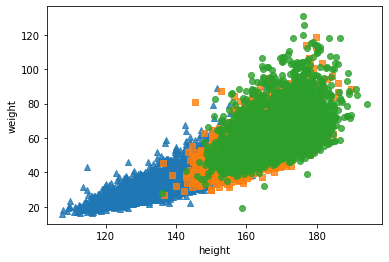

In [6]:
markers=['^', 's', 'o']  # elementary=0, middle=1, high=2

for i, marker in enumerate(markers):
    x_axis_data = df[df['school']==i]['height']
    y_axis_data = df[df['school']==i]['weight']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, alpha=0.8)

plt.xlabel('height')
plt.ylabel('weight')
plt.show()

- Normalize height and weight
- Shuffle and split data

In [7]:
df['height'] = df['height']/df['height'].max()  #194.2
df['weight'] = df['weight']/df['weight'].max()  #130.7

df = df.sample(frac=1, random_state=1).reset_index(drop=True)

df.head()

,school,sex,height,weight
0,1,1,0.874356,0.653405
1,2,1,0.829042,0.420811
2,0,1,0.614315,0.146136
3,0,1,0.621009,0.166029
4,1,0,0.859423,0.405509


In [8]:
data = np.asarray(df)

x, y = data.shape
x_train = data[:int(x * 0.8), 1:]
y_train = data[:int(x * 0.8), 0]
x_test = data[int(x * 0.8):, 1:]
y_test = data[int(x * 0.8):, 0]

print("Training X Size : " + str(x_train.shape))
print("Training Y Size : " + str(y_train.shape))
print("Test X Size : " + str(x_test.shape))
print("Test Y Size : " + str(y_test.shape))

Training X Size : (7745, 3)
Training Y Size : (7745,)
Test X Size : (1937, 3)
Test Y Size : (1937,)


# 3. Train Model

- Create neural network model using Keras

In [9]:
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20
243/243 [==============================] - 2s 3ms/step - loss: 1.0548 - accuracy: 0.5038 - val_loss: 0.9979 - val_accuracy: 0.5772
Epoch 2/20
243/243 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.6720 - val_loss: 0.7468 - val_accuracy: 0.6748
Epoch 3/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6826 - accuracy: 0.7011 - val_loss: 0.6491 - val_accuracy: 0.7068
Epoch 4/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6380 - accuracy: 0.7046 - val_loss: 0.6279 - val_accuracy: 0.7093
Epoch 5/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6258 - accuracy: 0.7066 - val_loss: 0.6160 - val_accuracy: 0.7026
Epoch 6/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6184 - accuracy: 0.7087 - val_loss: 0.6144 - val_accuracy: 0.7150
Epoch 7/20
243/243 [==============================] - 1s 3ms/step - loss: 0.6128 - accuracy: 0.7132 - val_loss: 0.6104 - val_accuracy: 0.7114
Epoch 

- Visualize model

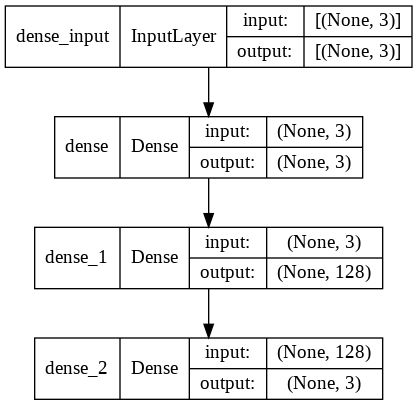

In [12]:
plot_model(model, 'model.png', show_shapes=True)

# 4. Evaluate Model 

- Visualize accuracy and loss history

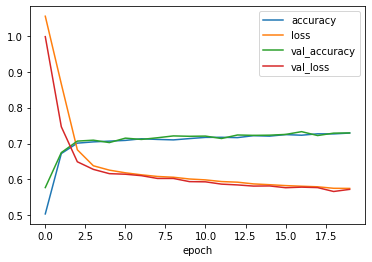

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.savefig('result.png')
plt.show()